# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build a df with city names and empty columns to fill

city_data = pd.DataFrame({"City": cities})
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Humidity"] = ""
city_data["Cloudiness"] = ""
city_data["Wind Speed"] = ""
city_data["Country"] = ""
city_data["Date"] = ""

# Base URL

base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL (inside a for loop)

for index, row in city_data.iterrows():

    city_to_look_up = row["City"]
    units = "imperial"

    query_url = f"{base_url}appid={weather_api_key}&q={city_to_look_up}&units={units}"

    # Request JSON data
    json_data = requests.get(query_url).json()
    
    try:
        print(f"Retrieving data for city #{index + 1}: {city_to_look_up.title()}...")
        city_data.loc[index, "Lat"] = float(json_data['coord']['lat'])
        city_data.loc[index, "Lng"] = float(json_data['coord']['lon'])
        city_data.loc[index, "Max Temp"] = float(json_data['main']['temp_max'])
        city_data.loc[index, "Humidity"] = float(json_data['main']['humidity'])
        city_data.loc[index, "Cloudiness"] = float(json_data['clouds']['all'])
        city_data.loc[index, "Wind Speed"] = float(json_data['wind']['speed'])
        city_data.loc[index, "Country"] = json_data['sys']['country']
        city_data.loc[index, 'Date'] = json_data['dt']
    except (KeyError, IndexError):
        print(f"Data not found for #{index + 1}: {city_to_look_up.title()}. Skipping...")
        
    time.sleep(1)

Retrieving data for city #1: Saskylakh...
Retrieving data for city #2: Sorvag...
Data not found for #2: Sorvag. Skipping...
Retrieving data for city #3: Korcula...
Retrieving data for city #4: Busselton...
Retrieving data for city #5: Nikolskoye...
Retrieving data for city #6: Barrow...
Retrieving data for city #7: Port Alfred...
Retrieving data for city #8: Vila Franca Do Campo...
Retrieving data for city #9: Jamestown...
Retrieving data for city #10: Owando...
Retrieving data for city #11: Mme...
Data not found for #11: Mme. Skipping...
Retrieving data for city #12: Mataura...
Retrieving data for city #13: Severo-Kurilsk...
Retrieving data for city #14: Yellowknife...
Retrieving data for city #15: Tonstad...
Retrieving data for city #16: Brae...
Retrieving data for city #17: Namatanai...
Retrieving data for city #18: Bengkulu...
Retrieving data for city #19: Umzimvubu...
Data not found for #19: Umzimvubu. Skipping...
Retrieving data for city #20: Khatanga...
Retrieving data for city 

Retrieving data for city #172: Umm Lajj...
Retrieving data for city #173: Castro...
Retrieving data for city #174: Sur...
Retrieving data for city #175: Watsa...
Retrieving data for city #176: Port Elizabeth...
Retrieving data for city #177: South Venice...
Retrieving data for city #178: Salalah...
Retrieving data for city #179: Mayumba...
Retrieving data for city #180: Yatou...
Retrieving data for city #181: Tromso...
Retrieving data for city #182: Yantal...
Retrieving data for city #183: Cap-Aux-Meules...
Retrieving data for city #184: Clonakilty...
Retrieving data for city #185: Tura...
Retrieving data for city #186: Ostrovnoy...
Retrieving data for city #187: Arlit...
Retrieving data for city #188: Fairbanks...
Retrieving data for city #189: Skjervoy...
Retrieving data for city #190: Marrakesh...
Retrieving data for city #191: La Ronge...
Retrieving data for city #192: Amderma...
Data not found for #192: Amderma. Skipping...
Retrieving data for city #193: Chattanooga...
Retrieving 

Retrieving data for city #349: Yanan...
Data not found for #349: Yanan. Skipping...
Retrieving data for city #350: Constantine...
Retrieving data for city #351: Waingapu...
Retrieving data for city #352: Mayo...
Retrieving data for city #353: Mangan...
Retrieving data for city #354: Pochutla...
Retrieving data for city #355: Joao Pinheiro...
Retrieving data for city #356: Kupang...
Retrieving data for city #357: Cururupu...
Retrieving data for city #358: Tiksi...
Retrieving data for city #359: Victor Harbor...
Retrieving data for city #360: Muyezerskiy...
Retrieving data for city #361: Solano...
Retrieving data for city #362: Torrington...
Retrieving data for city #363: Boma...
Retrieving data for city #364: Lakatoro...
Retrieving data for city #365: Saldanha...
Retrieving data for city #366: Cabedelo...
Retrieving data for city #367: Skalistyy...
Data not found for #367: Skalistyy. Skipping...
Retrieving data for city #368: Sfantu Gheorghe...
Retrieving data for city #369: Tsaratanana

Retrieving data for city #524: Malidong...
Retrieving data for city #525: Guerrero Negro...
Retrieving data for city #526: Xiongyue...
Retrieving data for city #527: Ushtobe...
Retrieving data for city #528: Cam Ranh...
Retrieving data for city #529: Kavaratti...
Retrieving data for city #530: Manati...
Retrieving data for city #531: Ilulissat...
Retrieving data for city #532: Abnub...
Retrieving data for city #533: Ca Mau...
Retrieving data for city #534: Lasa...
Retrieving data for city #535: Uvinza...
Retrieving data for city #536: Opuwo...
Retrieving data for city #537: West Bay...
Retrieving data for city #538: Alto Araguaia...
Retrieving data for city #539: Nicoya...
Retrieving data for city #540: Sakaiminato...
Retrieving data for city #541: Grao Mogol...
Retrieving data for city #542: Kamenka...
Retrieving data for city #543: Mirabad...
Retrieving data for city #544: Vinh...
Retrieving data for city #545: Liverpool...
Retrieving data for city #546: Komsomolskiy...
Retrieving da

In [9]:
# Drop cities with empty observations present after data retrieval
no_empty_cities = city_data.loc[city_data["Lat"] != ""]
no_empty_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.083,-19.68,83,6,11.79,RU,1612970759
2,Korcula,42.9622,17.1369,53.6,94,90,14.97,HR,1612970761
3,Busselton,-33.65,115.333,55,94,0,10.18,AU,1612970762
4,Nikolskoye,59.7035,30.7861,10.99,78,75,2.24,RU,1612970763
5,Barrow,71.2906,-156.789,-14.8,76,90,16.11,US,1612970765
...,...,...,...,...,...,...,...,...,...
595,Nardaran,40.5561,50.0056,46.4,100,0,9.22,AZ,1612971463
596,Birmingham,33.5207,-86.8025,57.99,72,1,3.44,US,1612971332
598,Novoagansk,61.9449,76.6625,-15.16,88,100,11.12,RU,1612971467
600,Bairiki,1.3292,172.975,78.8,83,40,10.36,KI,1612971469


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Transform "object" numeric columns to float
city_data = no_empty_cities.convert_dtypes()

# Verify data types
city_data.dtypes

City           string
Lat           float64
Lng           float64
Max Temp      float64
Humidity        Int64
Cloudiness      Int64
Wind Speed    float64
Country        string
Date            Int64
dtype: object

In [16]:
# Verify using describe()
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.630598,16.898858,51.073761,70.122966,50.309222,7.675606,1.612971e+09
std,32.397065,88.252581,33.799231,20.684905,38.755648,5.273212,2.117313e+02
min,-54.800000,-175.200000,-43.600000,8.000000,0.000000,0.400000,1.612971e+09
25%,-3.783300,-59.783300,26.600000,60.000000,10.000000,3.470000,1.612971e+09
50%,25.766700,18.423200,62.600000,74.000000,42.000000,6.890000,1.612971e+09
75%,48.572200,92.305800,78.800000,86.000000,90.000000,10.180000,1.612971e+09
max,78.218600,179.316700,101.880000,100.000000,100.000000,34.400000,1.612971e+09


In [17]:
# Store into a .csv file and display
city_data.to_csv(output_data_file)
city_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-19.68,83,6,11.79,RU,1612970759
2,Korcula,42.9622,17.1369,53.60,94,90,14.97,HR,1612970761
3,Busselton,-33.6500,115.3333,55.00,94,0,10.18,AU,1612970762
4,Nikolskoye,59.7035,30.7861,10.99,78,75,2.24,RU,1612970763
5,Barrow,71.2906,-156.7887,-14.80,76,90,16.11,US,1612970765
6,Port Alfred,-33.5906,26.8910,78.01,88,31,3.00,ZA,1612970766
7,Vila Franca Do Campo,37.7167,-25.4333,64.00,88,75,19.57,PT,1612970543
8,Jamestown,42.0970,-79.2353,19.00,73,1,3.44,US,1612970768
9,Owando,-0.4819,15.8999,91.44,38,100,2.86,CG,1612970769
11,Mataura,-46.1927,168.8643,50.32,84,100,13.15,NZ,1612970771


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

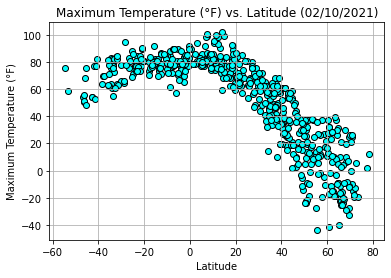

In [32]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], facecolor = "cyan", edgecolor = "black")
plt.grid()
plt.title("Maximum Temperature (°F) vs. Latitude (02/10/2021)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")
plt.savefig("output_data/TempVsLat.png")
plt.show()

This graph displays a clear tendency for the temperature to increase the closer the latitude is to the Equator (0 degrees latitude). The maximum temperature decreases slightly as the latitude decreases and it greatly decreases as the latitude increases. This is attributed to the season pattern difference between the southern hemisphere (latitude < 0) and the northern hemisphere (latitude > 0).

## Humidity vs. Latitude Plot

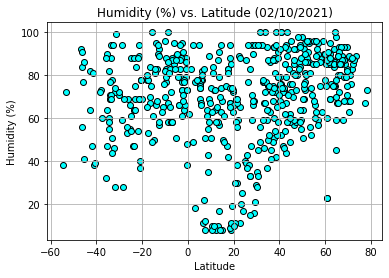

In [33]:
plt.scatter(city_data["Lat"], city_data["Humidity"], facecolor = "cyan", edgecolor = "black")
plt.grid()
plt.title("Humidity (%) vs. Latitude (02/10/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/HumidityVsLat.png")
plt.show()

Looking at the humidity vs. latitude scatterplot, a clear correlation or trend between these two variables is not observed. 

## Cloudiness vs. Latitude Plot

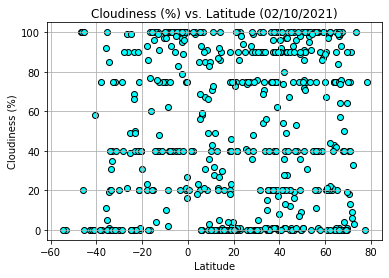

In [34]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], facecolor = "cyan", edgecolor = "black")
plt.grid()
plt.title("Cloudiness (%) vs. Latitude (02/10/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/CloudinessVsLat.png")
plt.show()

Cloudiness and latitude, as the previous plot, are not clearly correlated when looking at a scatterplot representing them.

## Wind Speed vs. Latitude

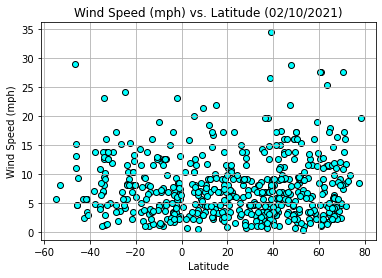

In [35]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], facecolor = "cyan", edgecolor = "black")
plt.grid()
plt.title("Wind Speed (mph) vs. Latitude (02/10/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/WindSpeedVsLat.png")
plt.show()

This presents a similar behavior to cloudiness and humidity related to latitude. There is no clear correlation between wind speed and latitude.

## Linear Regression

In [55]:
# Break down the dataset into northern hemisphere and southern hemisphere cities

northern_cities = city_data.loc[city_data["Lat"] >= 0]
southern_cities = city_data.loc[city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7813


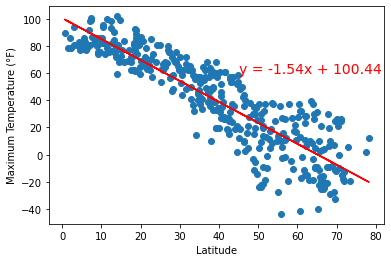

In [77]:
# Construct a linear regression

x_values = northern_cities["Lat"]
y_values = northern_cities["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (45, 60), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2336


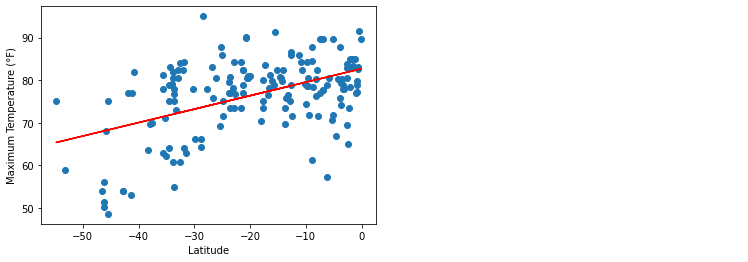

In [78]:
# Construct a linear regression

x_values = southern_cities["Lat"]
y_values = southern_cities["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (45, 60), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# show the plot
plt.show()

These linear regressions, when analyzed, show:

1. A strong negative correlation between northern hemisphere latitudes and temperature. 
2. A weaker positive correlation between southern hemisphere latitudes and temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1649


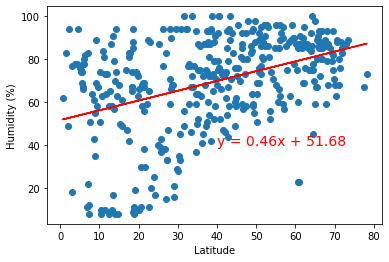

In [79]:
# Construct a linear regression

x_values = northern_cities["Lat"]
y_values = northern_cities["Humidity"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (40, 40), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0641


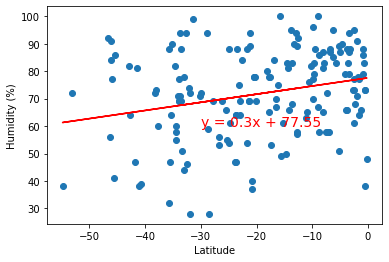

In [80]:
# Construct a linear regression

x_values = southern_cities["Lat"]
y_values = southern_cities["Humidity"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (-30, 60), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Show the plot
plt.show()

When analyzing the effect of latitude in humidity, we can appreciate two trends:

1. There is a weak positive correlation between northern hemisphere latitude and humidity. 
2. There is a very weak positive correlation between southern hemisphere latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0068


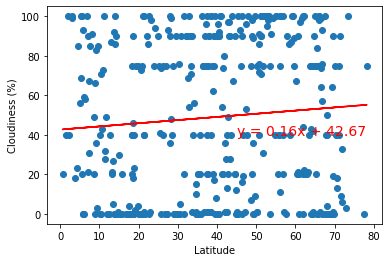

In [82]:
# Construct a linear regression

x_values = northern_cities["Lat"]
y_values = northern_cities["Cloudiness"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (45, 40), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2002


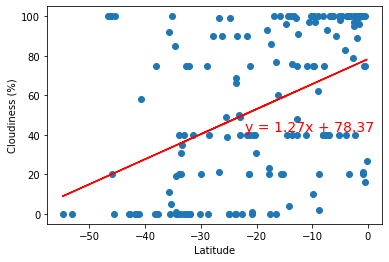

In [90]:
# Construct a linear regression

x_values = southern_cities["Lat"]
y_values = southern_cities["Cloudiness"].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (-22, 42), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show the plot
plt.show()

Both hemispheres show a positive correlation between cloudiness and latitude. However, the correlations are not strong.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0064


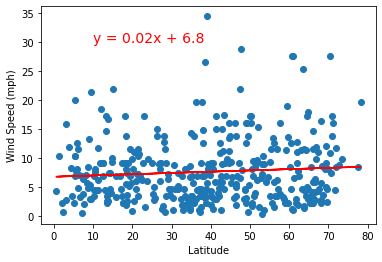

In [92]:
# Construct a linear regression

x_values = northern_cities["Lat"]
y_values = northern_cities["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (10, 30), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03


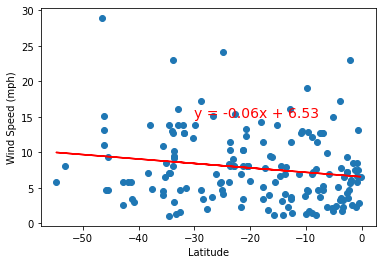

In [95]:
# Construct a linear regression

x_values = southern_cities["Lat"]
y_values = southern_cities["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculated projected values using the linear regression equation
regress_values = slope * x_values + intercept

# Create a string with the linear equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Draw plot and linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate equation and labels
plt.annotate(line_eq, (-30, 15), size = 14, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the R^2
print(f"The r-squared is: {round(rvalue**2, 4)}")

# Save and show the plot
plt.show()

When wind speed and latitude are analyzed using a linear regression, you can appreciate:

1. There is a positive correlation between northern hemisphere cities' wind speed and latitude.
2. There is a negative correlation between southern hemisphere cities' wind speed and latitude.

However, both correlations are very weak, since their R-squared values are close to 0.